# Hough Lines

知乎链接 https://zhuanlan.zhihu.com/p/615737359
- 通过x,y平面一点x1,y1的直线有无数条，这些如果用斜率a和截距b表示这些直线，就可以在a,b平面画出一条直线
- 当在x,y平面的两点x1,y1和x2,y2共线时,则在a,b平面上表示通过这两点直线的两条直线会有一个交汇，这个交汇点a和b即表示x1,y1和x2,y2所在的直线的斜率和截距
- 当在x,y平面有跟多个点都共处于这一条直线时，则在a,b平面上会有很多更多的直线交汇于这一点(a,b)，代表他们都共线，这条线的斜率是a，截距时b

### Import resources and display the image

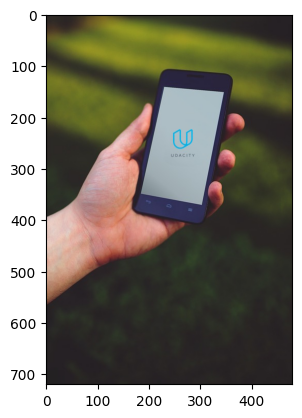

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

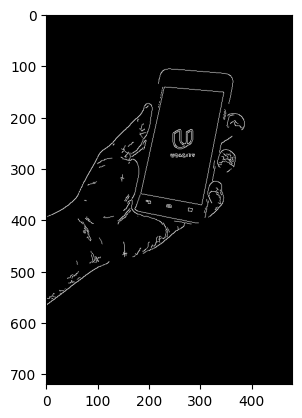

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

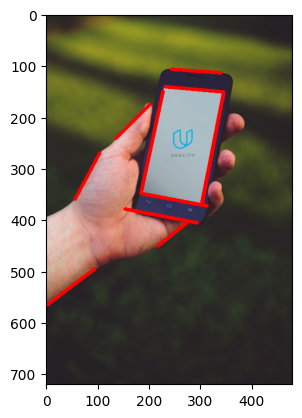

In [14]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 60 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50 # minimum number of pixels making up a line
max_line_gap = 10 # maximum gap in pixels between connectable line segments. A higher value merges more broken segments

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho= rho, theta= theta, threshold= threshold,
                        minLineLength=min_line_length, maxLineGap= max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5) # Draw the line on the image
        
plt.imshow(line_image)